# Principal Component Analysis

## import library

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [68]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

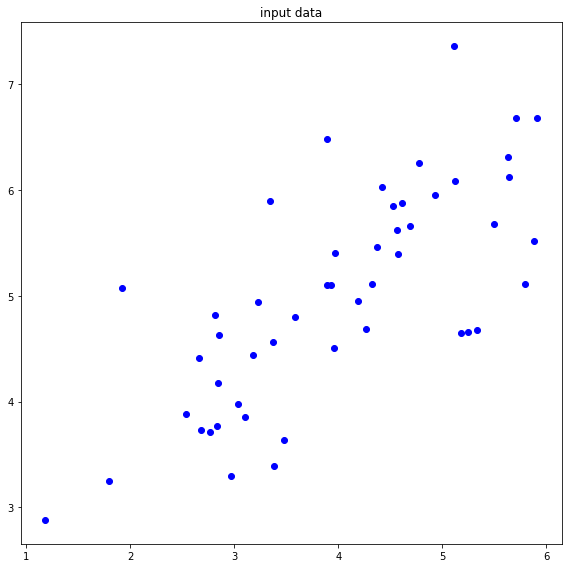

In [69]:
plt.figure(figsize=(8,8))   
plt.title('input data')
# ===================================================
plt.scatter(x, y, color='blue')
# ===================================================
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

mean of x =  -1.509903313490213e-16
mean of y =  -4.840572387365683e-16
std of x =  0.9999999999999999
std of y =  0.9999999999999999


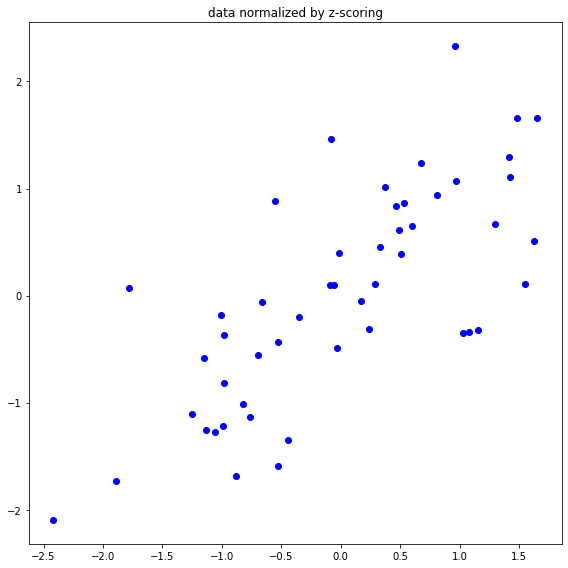

In [74]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')
# ===================================================
# fill up the blank

x_mean = np.mean(x)
y_mean = np.mean(y)

x_std = np.std(x)
y_std = np.std(y)

print('mean of x = ', x_mean)
print('mean of y = ', y_mean)
print('std of x = ', x_std)
print('std of y = ', y_std)

x = np.divide((x - x_mean), x_std)
y = np.divide((y - y_mean), y_std)

plt.scatter(x, y, color='blue')

# ===================================================
plt.tight_layout()
plt.show()

## compute covariance matrix

In [95]:
def compute_covariance(feature):
    # ===================================================
    x = feature[:,0]
    y = feature[:,1]
    Z = np.array((x, y)).T
    ZT = Z.T
    Sigma = (1/number_data)*(ZT@Z)
    # ===================================================
    return Sigma

## compute principal directions

In [97]:
def compute_eigen(X):
    # ====== eig_vector = U, eig_value = S==============
    S, U = np.linalg.eig(X)
    # ===================================================
    return S, U

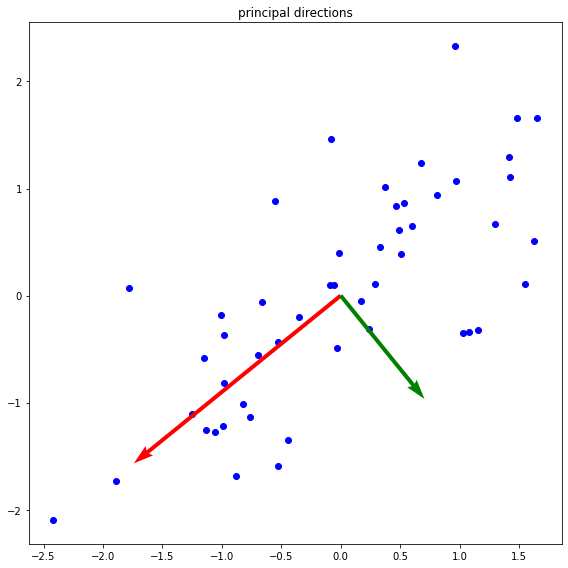

In [110]:
plt.figure(figsize=(8,8))
plt.title('principal directions')
# ===================================================

Sigma = compute_covariance(feature)
S, U = np.linalg.eig(Sigma)
origin = [0,0]

# EigenValue
pd1 = S[0]
pd2 = S[1]

# EigenVector
eigvec1 = U[0]
eigvec2 = U[1]

plt.scatter(x, y, color='blue')
plt.quiver(*origin, *eigvec1, color=['r'], scale=2)
plt.quiver(*origin, *eigvec2, color=['g'], scale=4)

# ===================================================
plt.tight_layout()
plt.show()

## first principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('first principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## second principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## compute the projection of point onto the line

In [ ]:
def compute_projection_onto_line(feature, vector):
    # ===================================================
    # fill up the function body
    #
    #
    # ===================================================
    return projection

## projcet to the first principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## projcet to the second principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the first principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('projection to the first principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

## connect original data to the projection onto the second principal axis

In [ ]:
plt.figure(figsize=(8,8))
plt.title('projection to the second principle axis')
# ===================================================
# fill up the blank
#
#
# ===================================================
plt.tight_layout()
plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

***

### 3. plot the first principal axis in red on the normalized data in blue

***

### 4. plot the second principal axis in red on the normalized data in blue

***

### 5. plot the projection of data in green onto the first principal axis in red

***

### 6. plot the projection of data in green onto the second principal axis in red

***

### 7. plot the projection line in grey onto the first principal axis

***

### 8. plot the projection line in grey onto the second principal axis

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***